# Tatajuba analysis on *Campylobacter* and *Bordetella*

This `jupyter` notebook contains the *Campylobacter* and *Bordetella* homopolymer tract analyses conducted with tatajuba. In particular it shows how to summarise and display the output information for the paper https://doi.org/10.1101/2021.06.02.446710.

## before running this notebook

If you want to run the analyses from scratch, you need to
1. Download the fastq files from samples described in [2103.bordetella_samples.csv](2103.bordetella_samples.csv) and [2103.campylobacter_samples.csv](2103.campylobacter_samples.csv), as well as the reference genomes from https://www.ncbi.nlm.nih.gov/assembly. 
2. Run tatajuba. Assuming that the fastq files are respectively on `003.srep38303/reads` and `004.bordetella/reads`, the command line would look something like

```bash
cd 004.bordetella
nohup tatajuba -b -p -i 8 -t 45 -d 1 -l 1 -k 28 -m 3 \\
    -g GCF_000195715.1_ASM19571v1_genomic.gff.gz \\
    --fasta GCF_000195715.1_ASM19571v1_genomic.fna.gz reads/* -o outdir.210427
cd 003.srep38303 
nohup tatajuba -b -p -i 8 -t 45 -d 1 -l 1 -k 28 -m 3 \\
    -g GCF_000148705.1_ASM14870v1_genomic.gff.gz \\
    --fasta GCF_000148705.1_ASM14870v1_genomic.fna.gz reads/* -o outdir.210427
 ```
## Generated output
 
In the example above, tatajuba will generate several files in subdirectories `outdir.210427`. You can download them here: [210427.outdir.txz](210427.outdir.txz). Since the output files are too big, they are compacted using `xz`. To decompress it, run
```bash
tar Jxvf 210427.outdir.txz
```

It will create two directories and consume 400MB of disk space.

## R notebook below

In [2]:
library(dendextend)
library(colorspace)
library(scales) ## alpha() transparency
library(gplots)
library(RColorBrewer)

In [3]:
a<-read.table("003.srep38303/outdir.210427/per_sample_average_length.tsv", sep="\t", header=T, check.names = F) # check.names replaces backslash by "."
#a<-a[,-ncol(a)]  ## remove last column since some versions of tatajuba added EXTRA tab 
x<-t(as.matrix(a[,4:length(a)]))
length(a)
rownames(x)<-gsub ("_1.fastq.gz","",rownames(x))
rownames(x)<-gsub (".*/","",rownames(x))

names<-read.table("003.srep38303/41598_2016_BFsrep38303_MOESM1_ESM.csv",header=T, sep=",")
xnames<-names$Isolate.name
names(xnames)<-names$ERR
xnames["reference"] <- "reference NC_017280.1"
rownames(x) <- xnames[rownames(x)] 
length(rownames(x))
calen <- x
colnames(calen) <- a$location

[1] 104

[1] 101

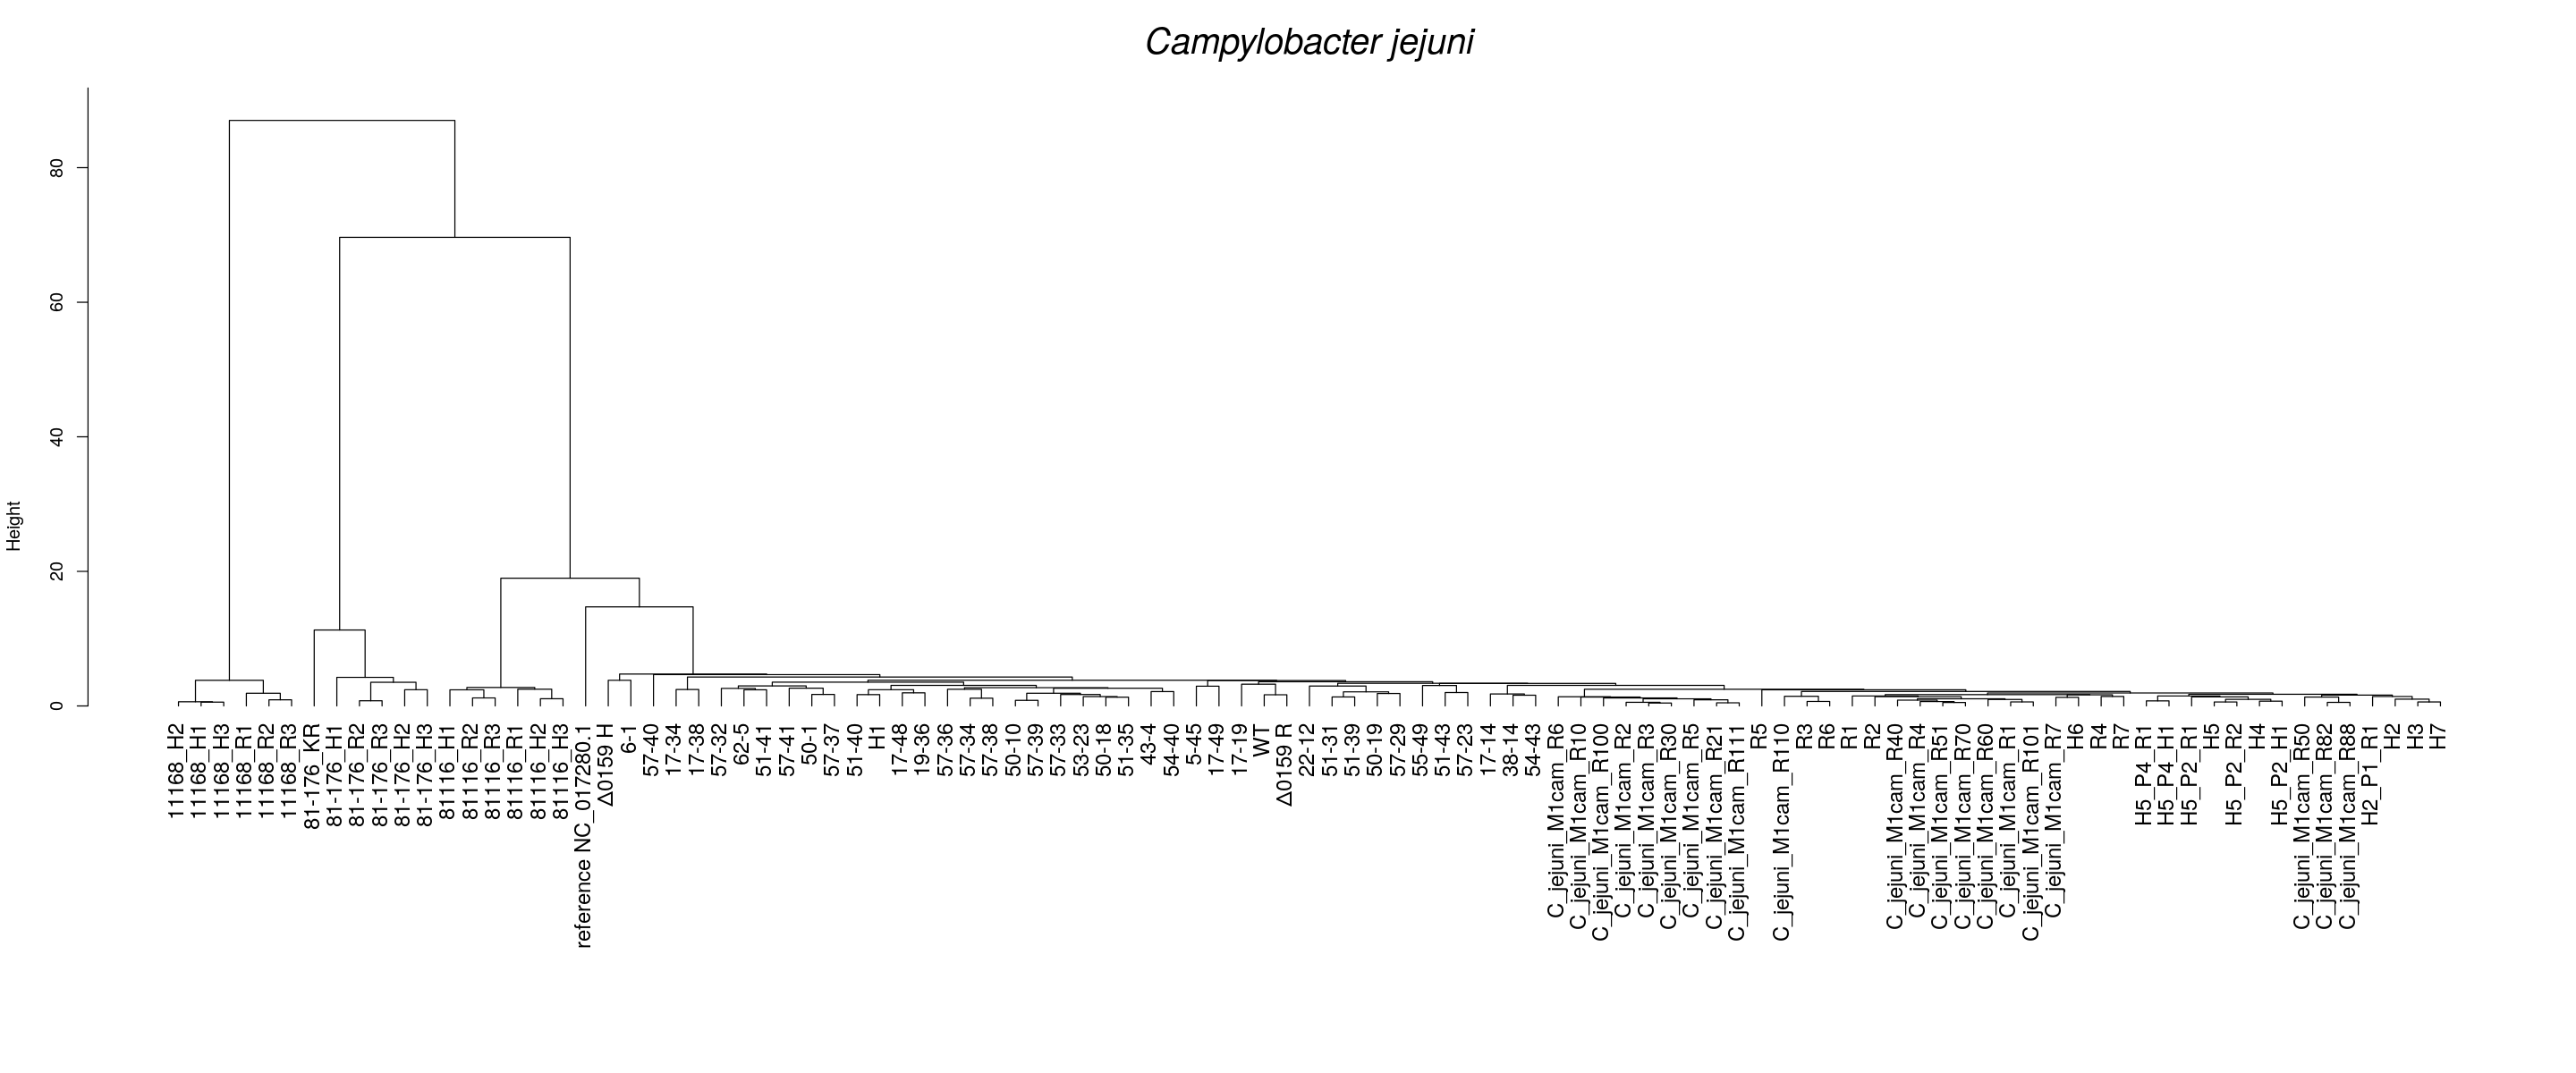

In [4]:
options(repr.plot.width=24, repr.plot.height=10) ; par(oma=c(0,0,0,0))
cls_campy <- hclust(dist(x), method="average") 
plot (cls_campy, hang=-0.01, main=expression(italic("Campylobacter jejuni")), cex=1.2, cex.main=2, xlab="",sub="")

In [5]:
a<-read.table("004.bordetella/outdir.210427/per_sample_average_length.tsv", sep="\t", header=T, check.names = F) # check.names replaces backslash by "."
#a<-a[,-ncol(a)]  ## remove last column SINCE CURRENT VERSION ADDS EXTRA tab 
x<-t(as.matrix(a[,4:length(a)]))
rownames(x)<-gsub ("_1.fastq.gz","",rownames(x))
rownames(x)<-gsub (".*/","",rownames(x)) ## remove path from filenames
rownames(x)<-gsub ("reference","reference NC_002929.2 pertussis_Tohama_I",rownames(x))
# add bioproject information to pertussis 
rownames(x)<-gsub ("_pertussis_France",  "_PRJEB42353_pertussis", rownames(x))
rownames(x)<-gsub ("_Ontario_pertussis", "_PRJNA356412_pertussis", rownames(x))
rownames(x)<-gsub ("_pertussis_Israel",  "_PRJNA348407_pertussis", rownames(x))
rownames(x)<-gsub ("_Illumina_MiSeq_paired_end_sequencing_Raw_reads_Sequencing_of_the_non-hemolytic_clone_of_B._pertussis_Tohama_I_delta-BP3063_mutant",
                   "_PRJEB38438_pertussis",rownames(x))
rownames(x)

[1] "reference NC_002929.2 pertussis_Tohama_I"
  [2] "ERR5101986_PRJEB42353_pertussis"         
  [3] "ERR5101987_PRJEB42353_pertussis"         
  [4] "ERR5101988_PRJEB42353_pertussis"         
  [5] "ERR5101996_PRJEB42353_pertussis"         
  [6] "ERR5101997_PRJEB42353_pertussis"         
  [7] "ERR5101998_PRJEB42353_pertussis"         
  [8] "ERR5102006_PRJEB42353_pertussis"         
  [9] "ERR5102007_PRJEB42353_pertussis"         
 [10] "ERR5102008_PRJEB42353_pertussis"         
 [11] "ERR5102016_PRJEB42353_pertussis"         
 [12] "ERR5102017_PRJEB42353_pertussis"         
 [13] "ERR5102018_PRJEB42353_pertussis"         
 [14] "ERR5102026_PRJEB42353_pertussis"         
 [15] "ERR5102027_PRJEB42353_pertussis"         
 [16] "ERR5102028_PRJEB42353_pertussis"         
 [17] "ERR5102036_PRJEB42353_pertussis"         
 [18] "ERR5102037_PRJEB42353_pertussis"         
 [19] "ERR5102038_PRJEB42353_pertussis"         
 [20] "ERR5102046_PRJEB42353_pertussis"         
 [21] "ERR5102047_PRJEB42353_pertussis"         
 [22] "ERR5102048_PRJEB42353_pertussis"         
 [23] "ERR5102056_PRJEB42353_pertussis"         
 [24] "ERR5102057_PRJEB42353_pertussis"         
 [25] "ERR5102058_PRJEB42353_pertussis"         
 [26] "ERR5102066_PRJEB42353_pertussis"         
 [27] "ERR5102067_PRJEB42353_pertussis"         
 [28] "ERR5102068_PRJEB42353_pertussis"         
 [29] "ERR5102076_PRJEB42353_pertussis"         
 [30] "ERR5102077_PRJEB42353_pertussis"         
 [31] "ERR5102078_PRJEB42353_pertussis"         
 [32] "ERR5102086_PRJEB42353_pertussis"         
 [33] "ERR5102087_PRJEB42353_pertussis"         
 [34] "ERR5102088_PRJEB42353_pertussis"         
 [35] "ERR5102096_PRJEB42353_pertussis"         
 [36] "ERR5102097_PRJEB42353_pertussis"         
 [37] "ERR5102098_PRJEB42353_pertussis"         
 [38] "ERR5102106_PRJEB42353_pertussis"         
 [39] "ERR5102107_PRJEB42353_pertussis"         
 [40] "ERR5102108_PRJEB42353_pertussis"         
 [41] "ERR5102116_PRJEB42353_pertussis"         
 [42] "ERR5102117_PRJEB42353_pertussis"         
 [43] "ERR5102118_PRJEB42353_pertussis"         
 [44] "ERR5102126_PRJEB42353_pertussis"         
 [45] "ERR5102127_PRJEB42353_pertussis"         
 [46] "ERR5102128_PRJEB42353_pertussis"         
 [47] "ERR5102136_PRJEB42353_pertussis"         
 [48] "ERR5102137_PRJEB42353_pertussis"         
 [49] "ERR5102138_PRJEB42353_pertussis"         
 [50] "ERR5102146_PRJEB42353_pertussis"         
 [51] "ERR5102147_PRJEB42353_pertussis"         
 [52] "ERR5102148_PRJEB42353_pertussis"         
 [53] "ERR5102156_PRJEB42353_pertussis"         
 [54] "ERR5102157_PRJEB42353_pertussis"         
 [55] "ERR5102158_PRJEB42353_pertussis"         
 [56] "ERR5102166_PRJEB42353_pertussis"         
 [57] "ERR5102167_PRJEB42353_pertussis"         
 [58] "ERR5102168_PRJEB42353_pertussis"         
 [59] "SRR4422986_PRJNA348407_pertussis"        
 [60] "SRR4422987_PRJNA348407_pertussis"        
 [61] "SRR4422988_PRJNA348407_pertussis"        
 [62] "SRR4422989_PRJNA348407_pertussis"        
 [63] "SRR4422990_PRJNA348407_pertussis"        
 [64] "SRR4422991_PRJNA348407_pertussis"        
 [65] "SRR4422992_PRJNA348407_pertussis"        
 [66] "SRR4422993_PRJNA348407_pertussis"        
 [67] "SRR4422994_PRJNA348407_pertussis"        
 [68] "SRR4422995_PRJNA348407_pertussis"        
 [69] "SRR4422996_PRJNA348407_pertussis"        
 [70] "SRR4422997_PRJNA348407_pertussis"        
 [71] "SRR4422998_PRJNA348407_pertussis"        
 [72] "SRR4422999_PRJNA348407_pertussis"        
 [73] "SRR4423000_PRJNA348407_pertussis"        
 [74] "SRR4423001_PRJNA348407_pertussis"        
 [75] "SRR4423002_PRJNA348407_pertussis"        
 [76] "SRR4423003_PRJNA348407_pertussis"        
 [77] "SRR4423004_PRJNA348407_pertussis"        
 [78] "SRR5080671_PRJNA356412_pertussis"        
 [79] "SRR5080672_PRJNA356412_pertussis"        
 [80] "SRR5080673_PRJNA356412_pertussis"        
 [81] "SRR5080674_PRJNA356412_pertussis"        
 [82] "SRR5080676_PRJNA356412_per

In [6]:
clst <- as.dendrogram(hclust(dist(x), method="average"))
bolen <- x
colnames(bolen) <- a$location

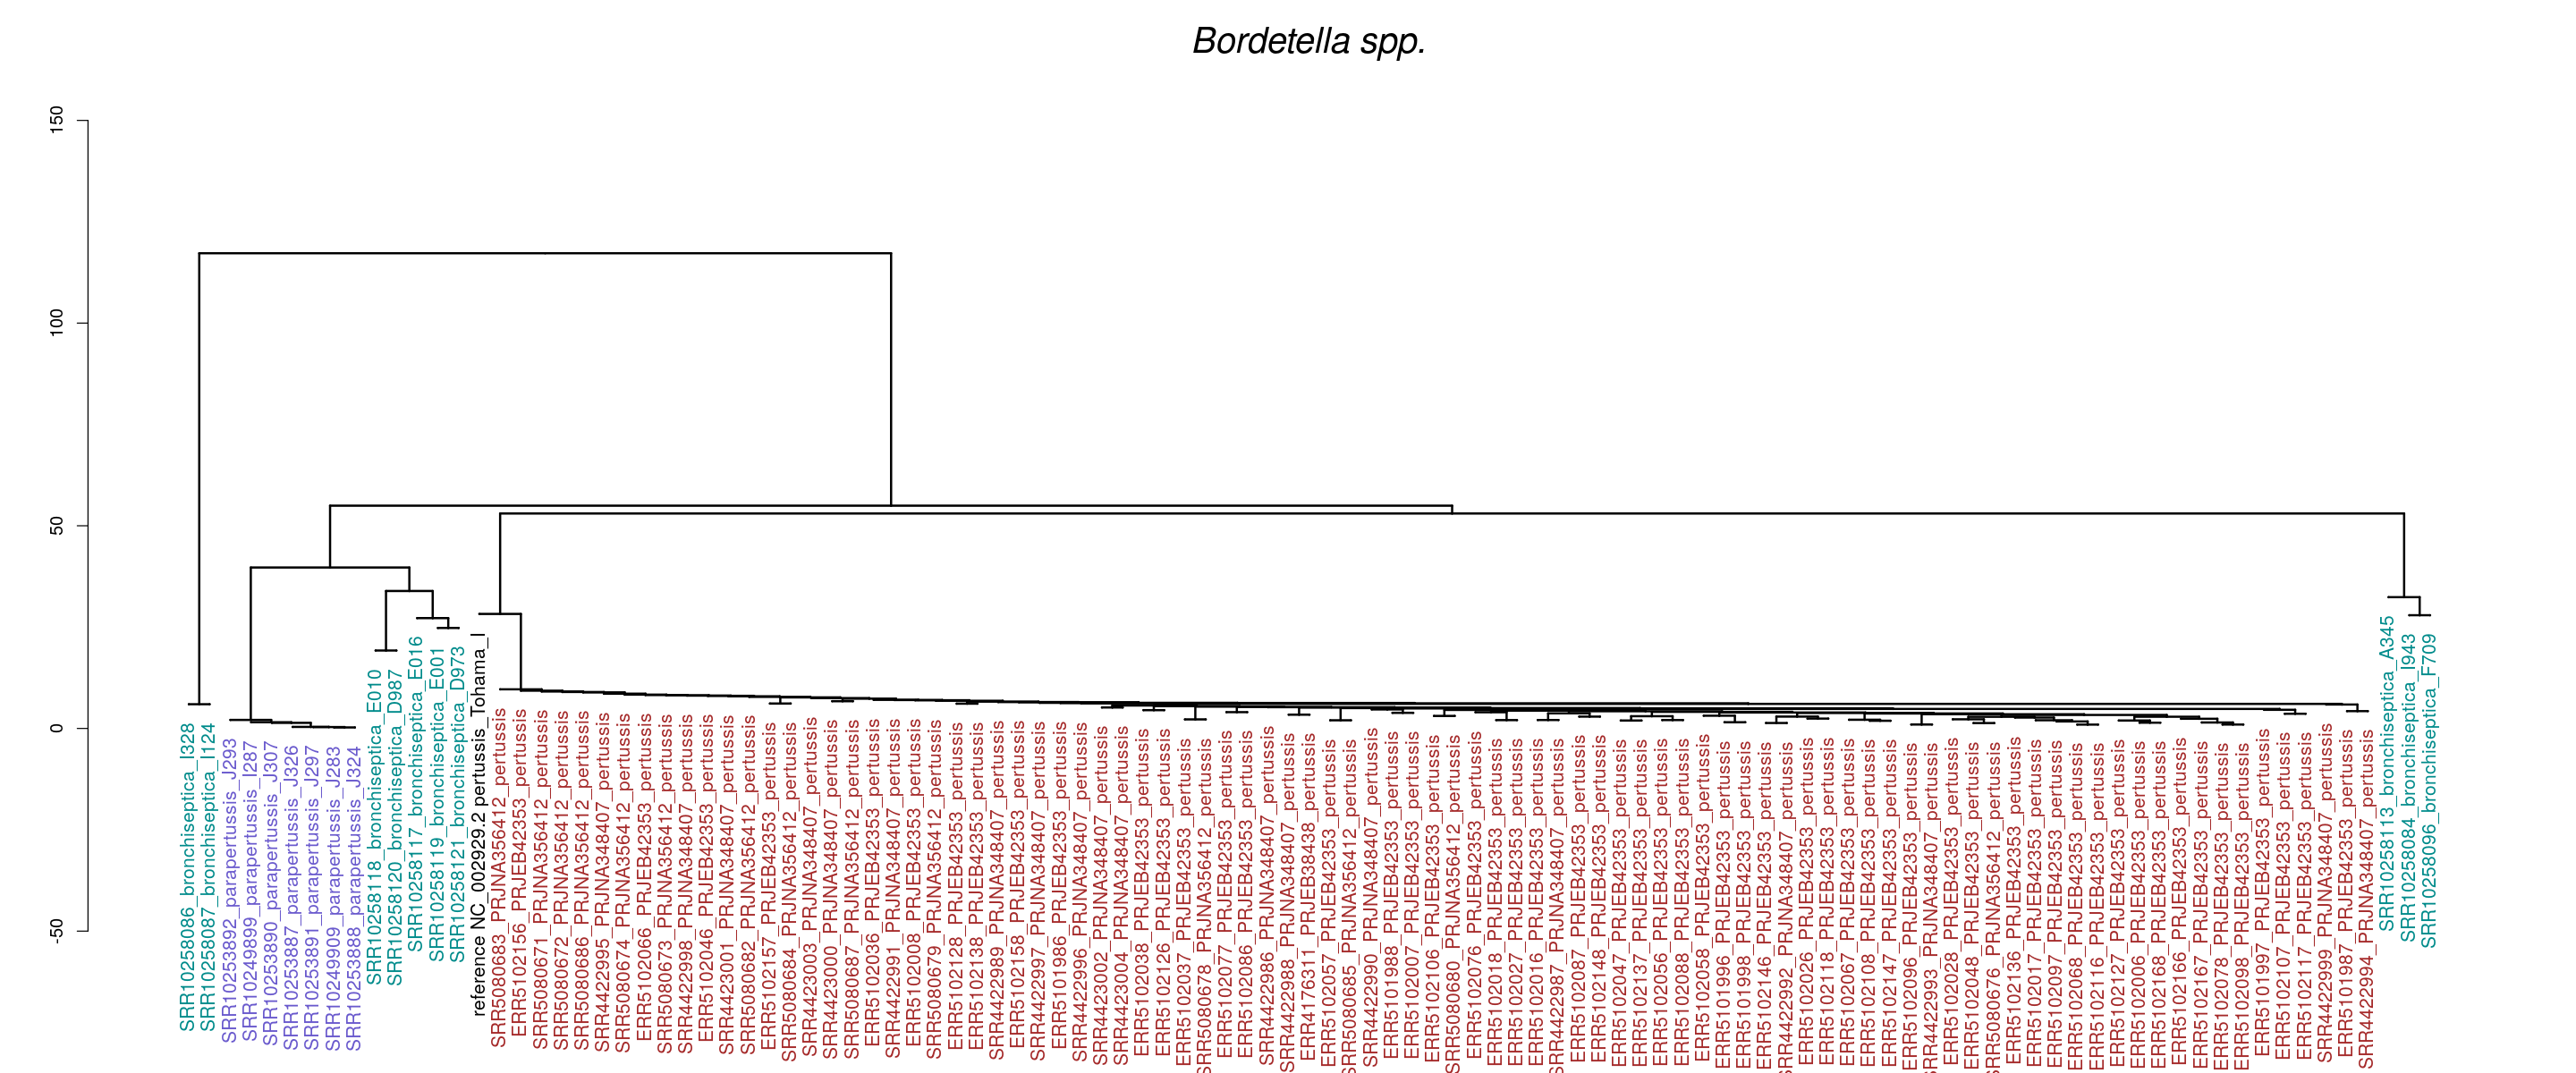

In [7]:
## write.csv (rownames(x), "bordetella.names") ## gawk -F '"' '{print $4}' bordetella.names | sort > 004.bordetella/accession_files/bordetella_samples.csv
options(repr.plot.width=24, repr.plot.height=10) ; par(oma=c(0,0,0,0))
dend <- clst
my_col_table <- c("black", "brown", "slateblue", "darkcyan")
col_to_use <- rep(1,length(rownames(x)))
col_to_use[grepl("_pertussis", rownames(x))] <- 2
col_to_use[grepl("_parapertussis", rownames(x))] <- 3
col_to_use[grepl("_bronchiseptica", rownames(x))] <- 4
#labels_colors(dend) <- colorspace::rainbow_hcl(4, c = 50, l  = 20)[ col_to_use[order.dendrogram(dend)]] ## reorder based on dendrogram
labels_colors(dend) <- my_col_table[ col_to_use[order.dendrogram(dend)]]

dend <- dend %>% hang.dendrogram(hang_height = 0.01) %>% set("branches_lwd", 2)  %>% set("labels_cex", 1.05)

plot (dend, main=expression(italic("Bordetella spp.")), cex=1.2, cex.main=2, xlab="",sub="", ylim=c(-50, 150))

In [14]:
svg(filename="figures/0427.both_upgma.svg", width=24, height=20, pointsize=12)
layout( matrix(c(1,2), ncol=1))
plot (cls_campy, hang=-0.01, main=expression(italic("Campylobacter jejuni")), cex.lab=1.1, cex=1.2, cex.main=2, xlab="",sub="")
plot (dend, main=expression(italic("Bordetella spp.")),  cex.lab=1.1, cex=1.2, cex.main=2, xlab="",sub="", ylim=c(-50, 150))
dev.off()

png 
  2

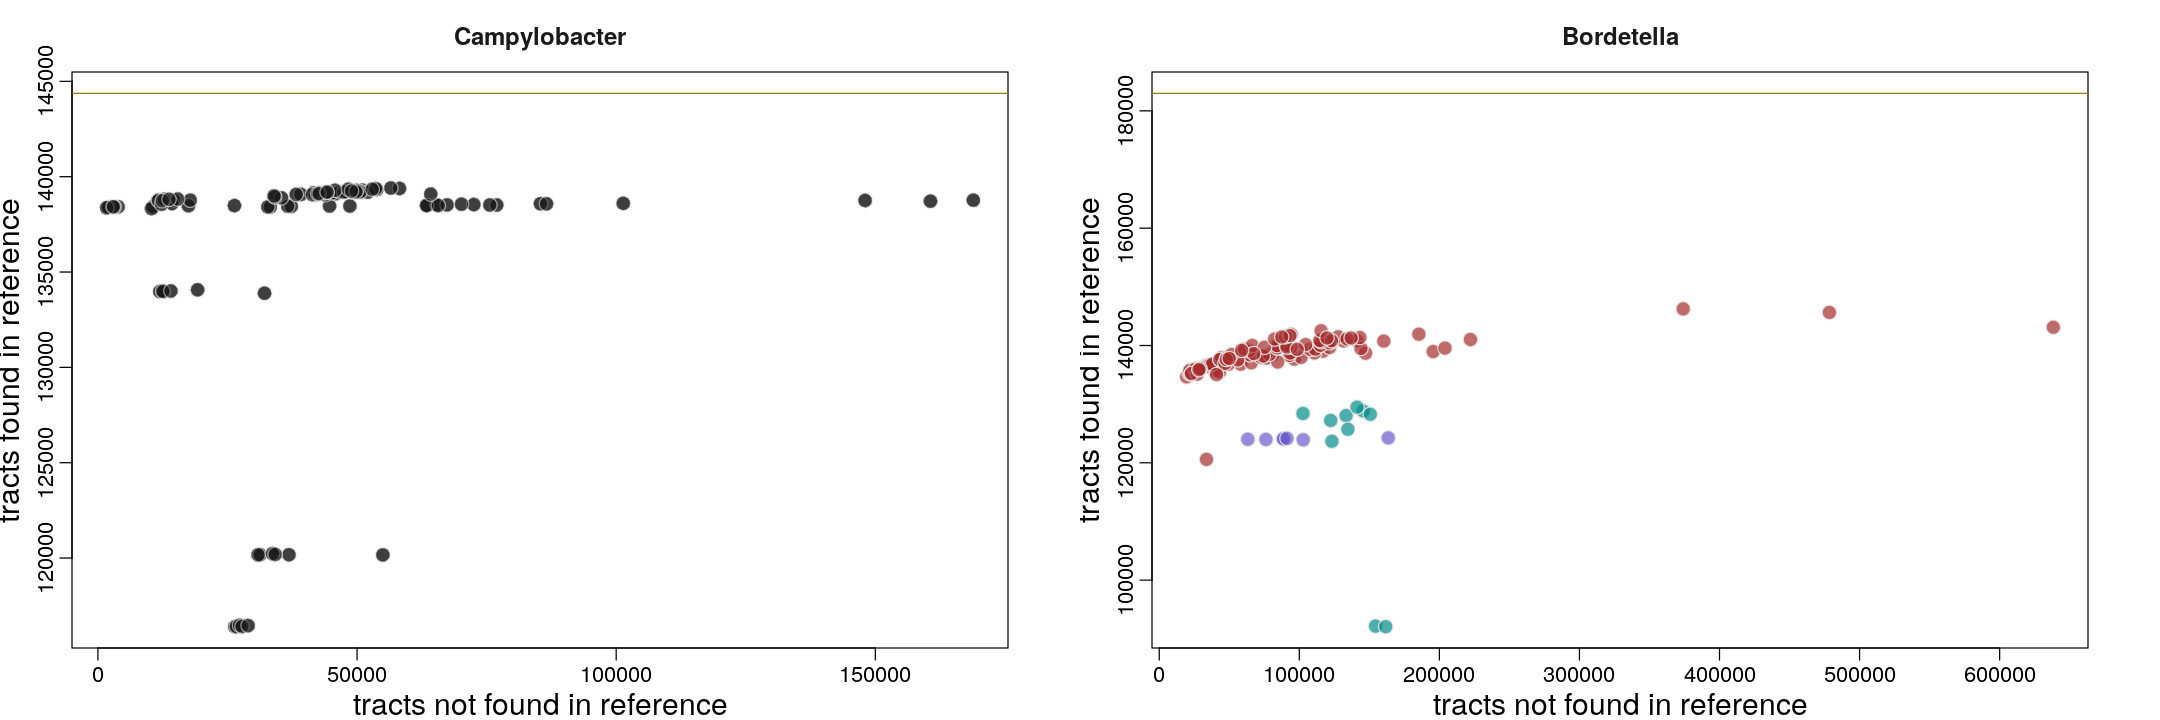

In [8]:
a1 <- read.table("003.srep38303/outdir.210427/not_found_in_ref_withnames.txt")
x1 <- read.table("003.srep38303/outdir.210427/tract_list.tsv", header=T)
x1 <- length(x1[,1])
a2 <- read.table("004.bordetella/outdir.210427/not_found_in_ref_withnames.txt")
x2 <- read.table("004.bordetella/outdir.210427/tract_list.tsv", header=T)
x2 <- length(x2[,1])

options(repr.plot.width=18, repr.plot.height=6)
options(scipen=4); # controls how easily it used scientific notation

par (font=2, cex=1.2, col.main="gray10", cex.axis=1.1, cex.lab=1.5,tcl=-0.5, mgp=c(2,0.6,0), mar=c(3,3,3,3));
layout(matrix(1:2,ncol=2,nrow=1, byrow=F));


plot(a1$V2, a1$V1, ylim=c(min(a1$V1),x1), xlab="tracts not found in reference", ylab="tracts found in reference", 
     pch=21, col=alpha("gray90",0.6), cex=1.6, bg=alpha("gray10",0.6),  main="Campylobacter") #  bg="gray80", col="firebrick"
abline (h=x1, col="gold4")

col_to_use <- rep(my_col_table[1],length(rownames(x)))
col_to_use[grepl("_pertussis", a2$V3)] <- my_col_table[2]
col_to_use[grepl("_parapertussis", a2$V3)] <- my_col_table[3]
col_to_use[grepl("_bronchiseptica", a2$V3)] <- my_col_table[4]

plot(a2$V2, a2$V1, ylim=c(min(a2$V1),x2), xlab="tracts not found in reference", ylab="tracts found in reference", 
     pch=21, col=alpha("gray90",0.9), cex=1.6, bg=alpha(col_to_use,0.7), main="Bordetella") ## "cadetblue"
abline (h=x2, col="gold4")

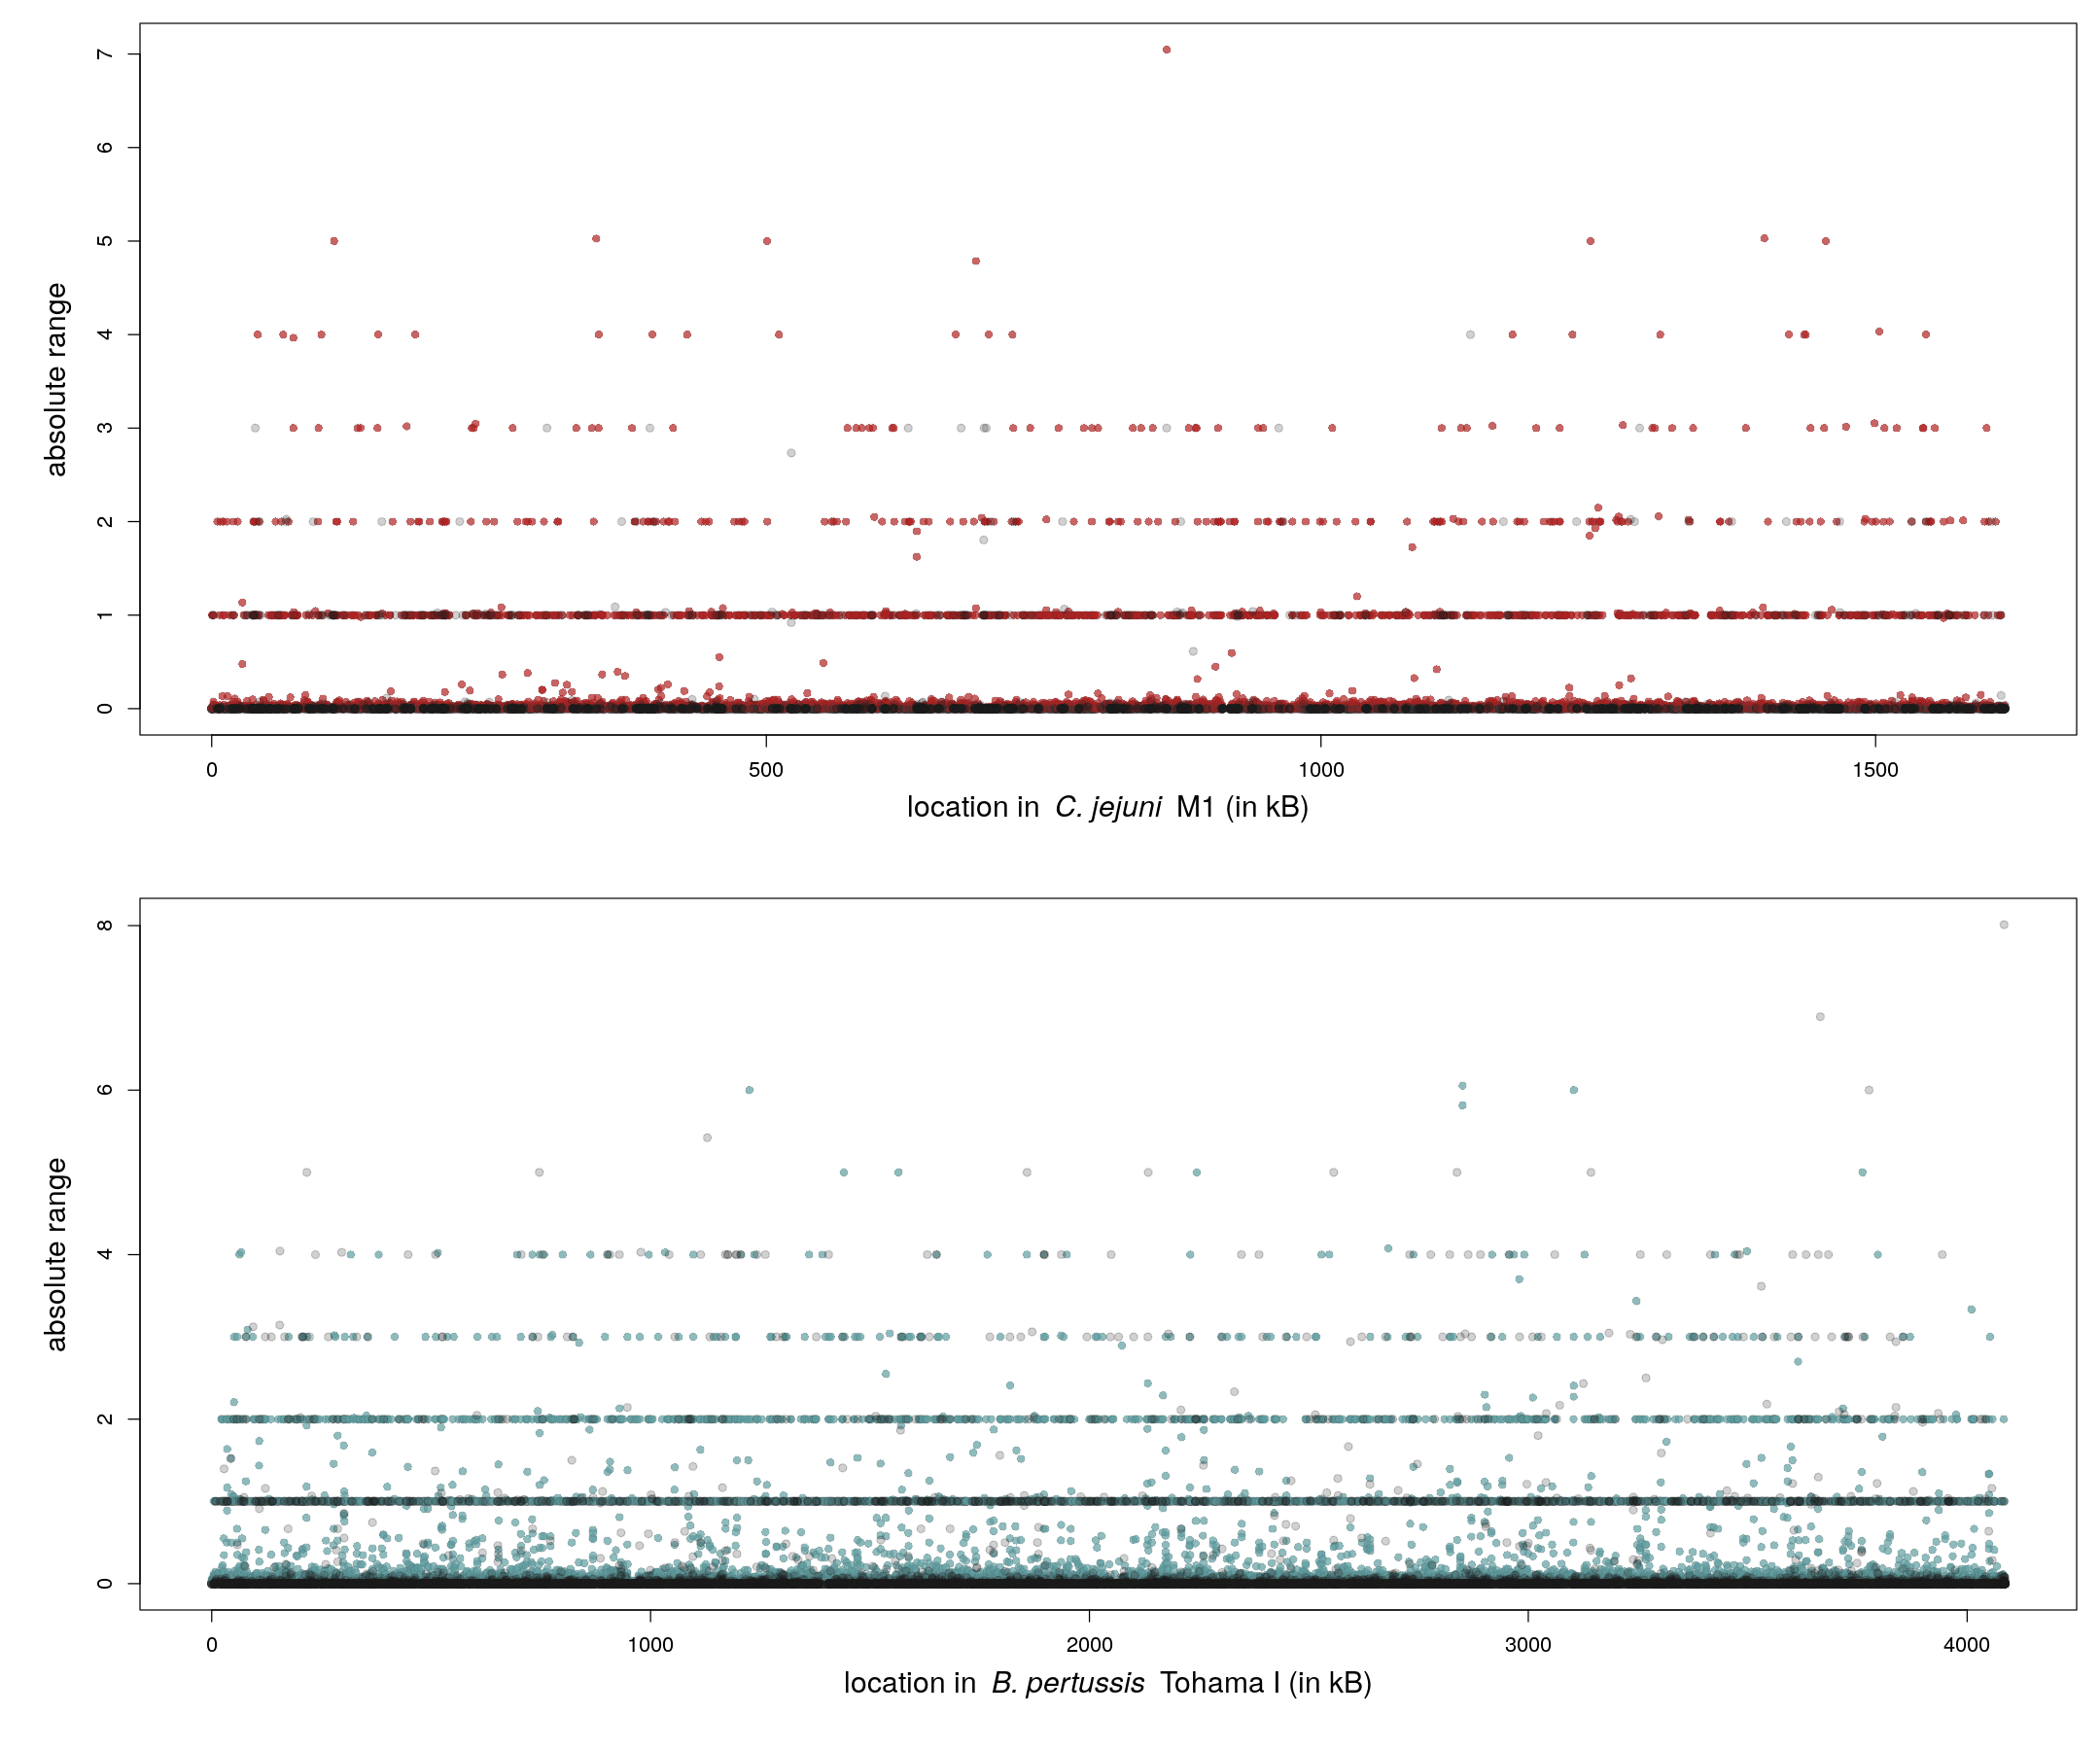

In [9]:
options(repr.plot.width=18, repr.plot.height=15)
par (cex=1.2, col.main="gray10", cex.axis=1.1, cex.lab=1.5, font=2, mar=c(6,6,1,1));
layout(matrix(1:2,ncol=1,nrow=2, byrow=F));
this_gray = rgb(0.2,0.2,0.2,0.1)
this_nonann = rgb(0.1,0.1,0.1,0.2)
this_cex = 0.9


x1<-read.table("003.srep38303/outdir.210427/selected_tracts_annotated.tsv", header=T)
x2<-read.table("003.srep38303/outdir.210427/selected_tracts_unknown.tsv", header=T)
x_lim = c(min(x1$location,x2$location),max(x1$location,x2$location))/1000
y_lim = c(min(x1$rd_avge_tract_length,x2$rd_avge_tract_length), max(x1$rd_avge_tract_length,x2$rd_avge_tract_length))

plot (x1$location/1000, x1$rd_avge_tract_length, ylim=y_lim, xlim=x_lim, xlab = expression("location in"~italic("C. jejuni")~"M1 (in kB)"), ylab="absolute range", 
     pch=21, bg=alpha("firebrick", 0.7), col=this_gray, cex=this_cex)
points (x2$location/1000, x2$rd_avge_tract_length, pch=21, bg=this_nonann, col=this_nonann, cex=this_cex)

x1<-read.table("004.bordetella/outdir.210427/selected_tracts_annotated.tsv", header=T)
x2<-read.table("004.bordetella/outdir.210427/selected_tracts_unknown.tsv", header=T)
x_lim = c(min(x1$location,x2$location),max(x1$location,x2$location))/1000
y_lim = c(min(x1$rd_avge_tract_length,x2$rd_avge_tract_length), max(x1$rd_avge_tract_length,x2$rd_avge_tract_length))

plot (x1$location/1000, x1$rd_avge_tract_length, ylim=y_lim, xlim=x_lim, xlab = expression("location in"~italic("B. pertussis")~"Tohama I (in kB)"), 
      ylab="absolute range", pch=21, bg=alpha("cadetblue", 0.7), col=this_gray, cex=this_cex)
points (x2$location/1000, x2$rd_avge_tract_length, pch=21, bg=this_nonann, col=this_nonann, cex=this_cex)

### the plots below rely on tables from original publications 
these tables are included in [210427.outdir.txz](210427.outdir.txz).

In [10]:
in_gene <- (as.numeric(colnames(calen)) > 1268323) & (as.numeric(colnames(calen)) < 1269717)
list_of_samples <- c("51-40", "11168_R1","H5_P2_R1", "17-19", "5-45", "38-14", "17-14", "17-34", "17-38", "17-49", "43-4", "C_jejuni_M1cam_R88", "22-12", 
                     "H5_P2_R2", "H5_P4_R1", "50-1", "H2_P1_R1", "62-5", "reference NC_017280.1", "81116_H1", "81116_R1", 
                     "81-176_KR", "81-176_R2", "C_jejuni_M1cam_R10") 
# rownames(calen)
in_sample <- as.logical(lapply(rownames(calen), function(x){x %in% list_of_samples}))
x <- calen[in_sample, in_gene]

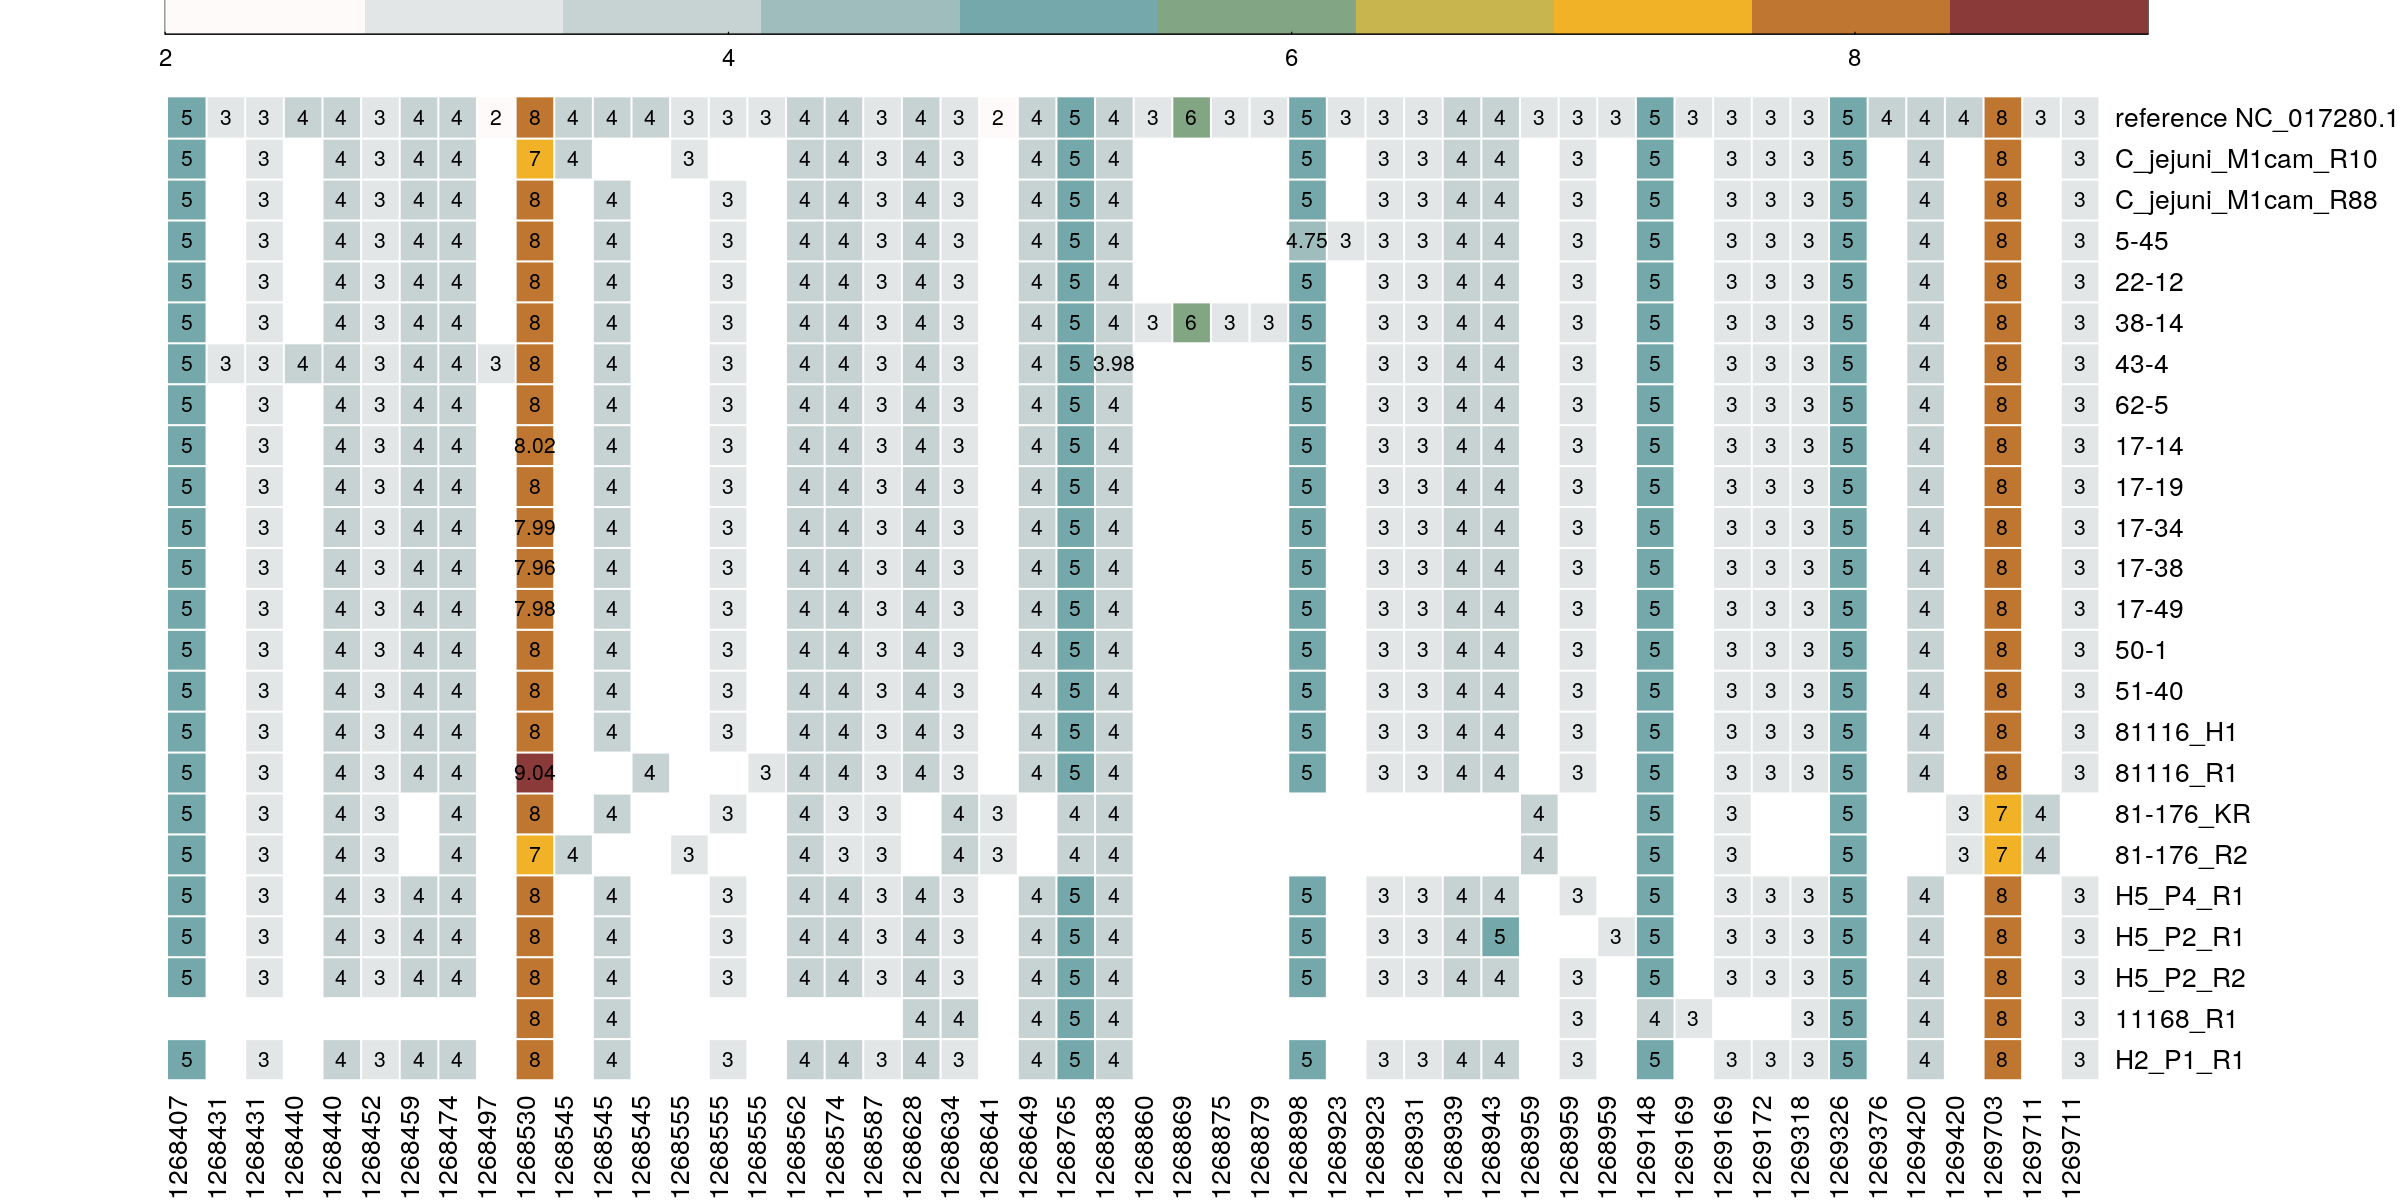

In [11]:
options(repr.plot.width=20, repr.plot.height=10)
par(oma=c(2.6,0,0,14))

#coul <- colorRampPalette(brewer.pal(9, "YlOrBr"))(12)[2:12]
coul <- colorRampPalette(c("snow", "azure3", "cadetblue", "goldenrod1", "indianred4"))(10)

x2 <- ifelse (x < 0.1, "", round(x,2))
heatmap.2 (x, scale="none", col= coul, # do not rescale (standardise) values
           cexRow=2, cexCol=2, # column text size
           rowsep=1:110, colsep=1:450,  sepwidth=c(0.02, 0.02),
           Colv=FALSE, Rowv = FALSE, dendrogram = "none", 
           cellnote = x2, notecex=1.6, notecol="black",  ## numbers inside cells
           tracecol=NA,  # remove vertical lines
           lmat = rbind( c(0,4), c(0, 3), c(2,1) ), lhei=c(1, 0.1, 12), lwid=c(1,12),  # proportions of width and height
           key=TRUE, keysize=0.2, key.ylab=NA, key.xlab=NA, symkey=FALSE, symbreaks=FALSE, key.title = NA, density.info="none",
           key.par=list(cex.axis=1.6, tcl=0.1, mar=c(3,0,0,0))
           )    # remove color histogram from top left corner

In [12]:
article_idx <- read.csv("004.bordetella/1471-2164-8-122-S3_pertussis.csv", header=T)$Start
is_it_close <- function (x) {
    y <- sort (abs(as.numeric(x)-article_idx))[1]
    if ( y < 50) {
        #print(paste(x,y)); 
        return (TRUE);
    }
    return (FALSE);
}

new_bolen <- bolen[,bolen["reference NC_002929.2 pertussis_Tohama_I",]>4]  ## only big HT
in_gene <- as.logical(lapply(colnames(new_bolen), is_it_close))
#rownames(new_bolen)
#in_gene <- (as.numeric(colnames(calen)) > 1268323) & (as.numeric(colnames(calen)) < 1269717)
list_of_samples <- c("reference NC_002929.2 pertussis_Tohama_I", "ERR4176311_PRJEB38438_pertussis",
                     "ERR5101986_PRJEB42353_pertussis",  "ERR5102167_PRJEB42353_pertussis","ERR5102046_PRJEB42353_pertussis",
                     "SRR4422986_PRJNA348407_pertussis", "SRR4423004_PRJNA348407_pertussis",
                     "SRR5080672_PRJNA356412_pertussis", "SRR5080683_PRJNA356412_pertussis",
                    "SRR10258084_bronchiseptica_I943", "SRR10258119_bronchiseptica_E001", "SRR10258086_bronchiseptica_I328", 
                     "SRR10253892_parapertussis_J293", "SRR10253890_parapertussis_J307") 

in_sample <- as.logical(lapply(rownames(new_bolen), function(x){x %in% list_of_samples}))
x <- new_bolen[in_sample, in_gene]
x <- x[match(list_of_samples,rownames(x)),]

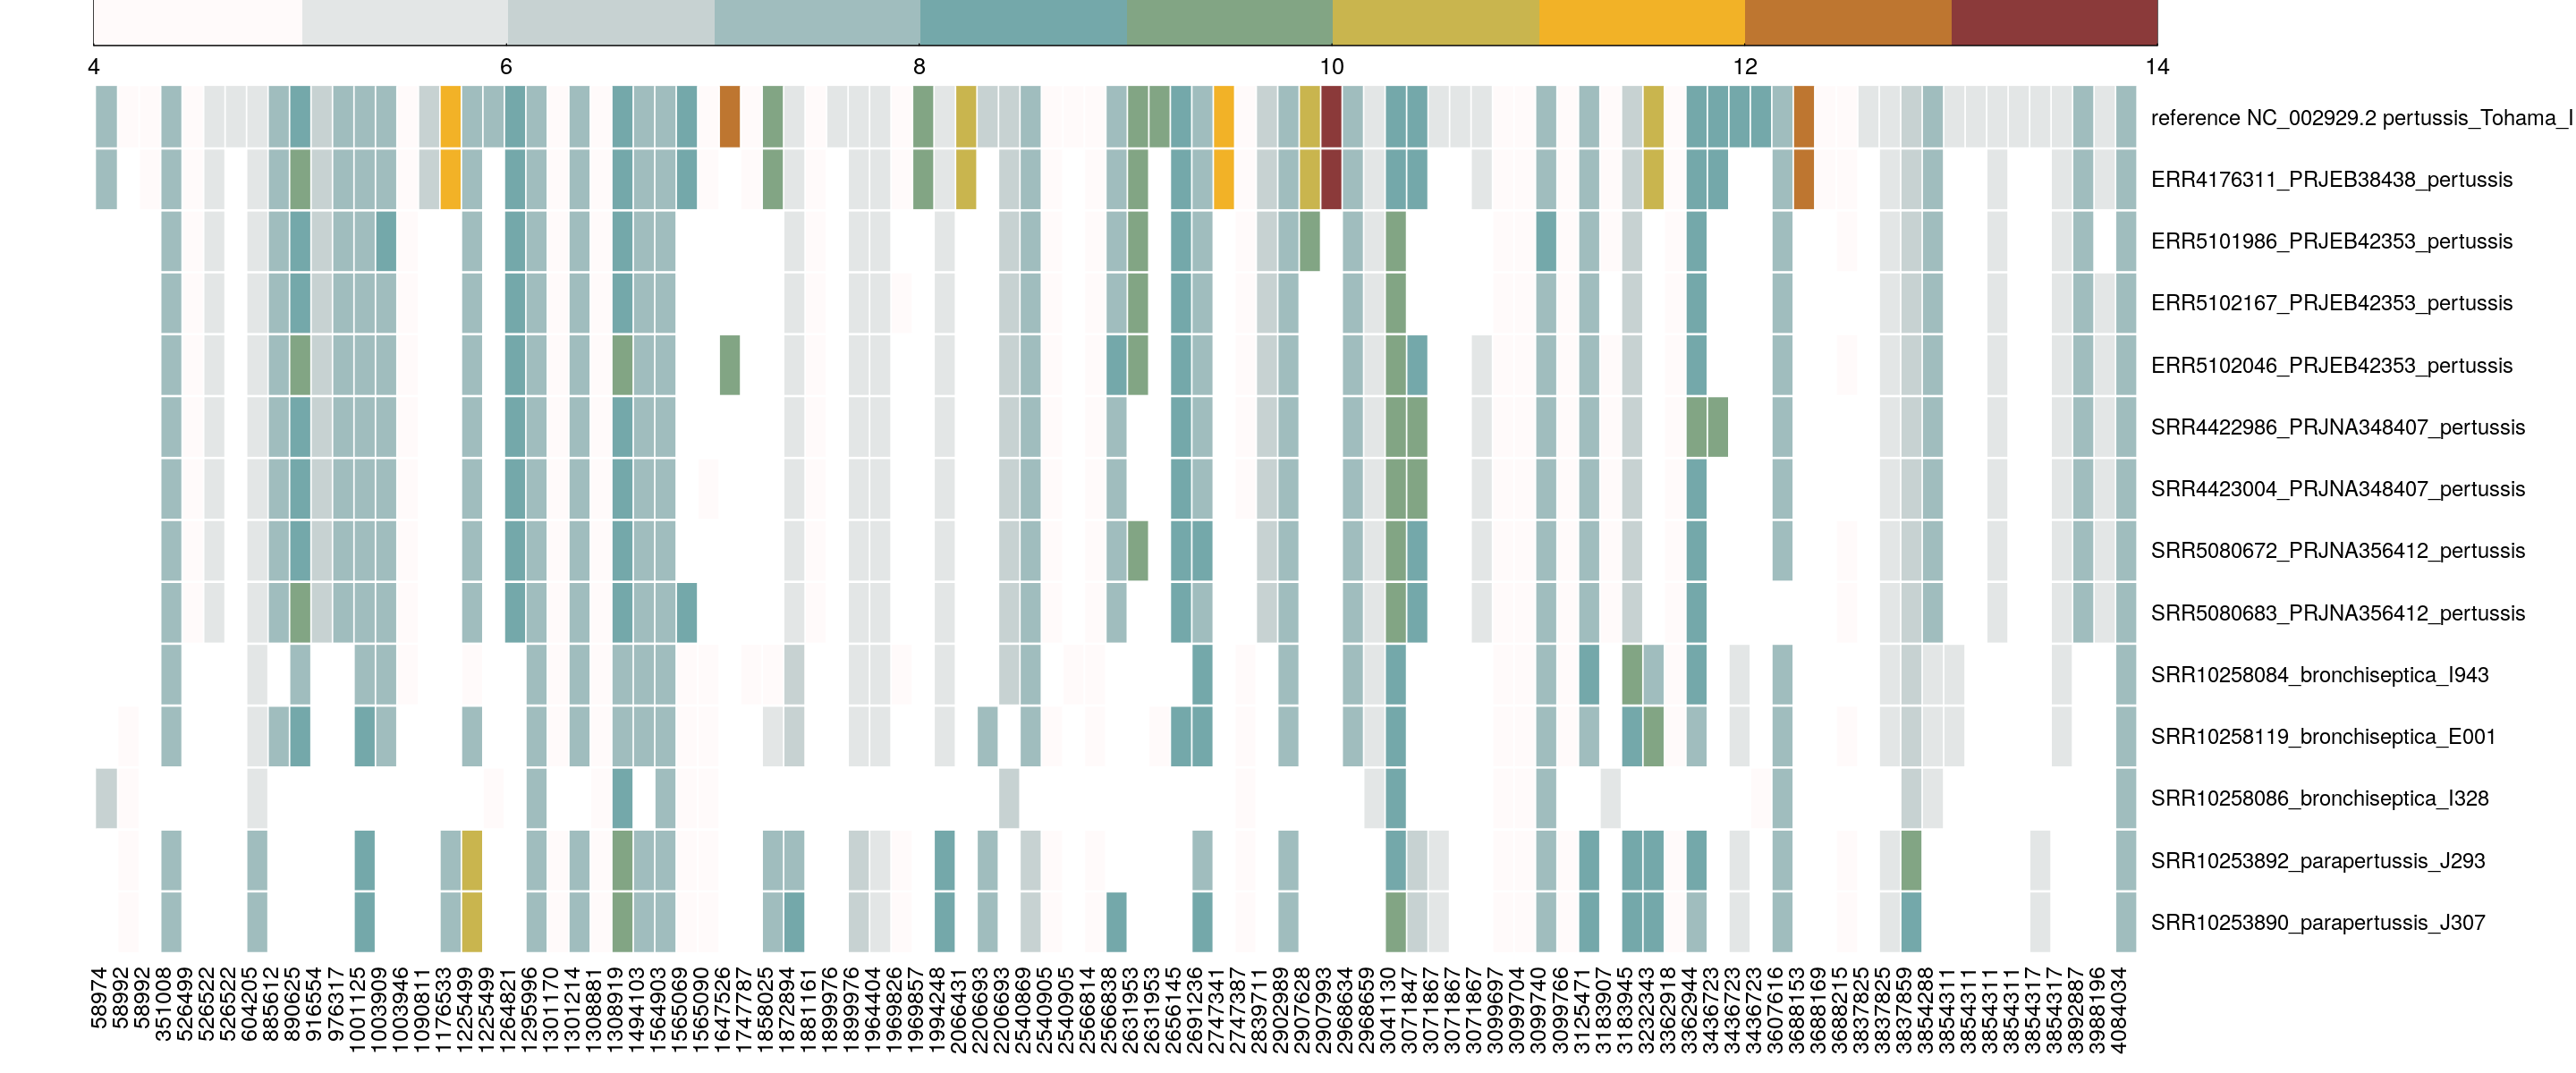

In [13]:
options(repr.plot.width=24, repr.plot.height=10)
par(oma=c(3.5,0,0,26))

x2 <- ifelse (x < 0.1, "", round(x,1))
heatmap.2 (x, scale="none", col= coul, # do not rescale (standardise) values
           cexRow=1.8, cexCol=1.9, # column text size
           rowsep=1:110, colsep=1:450,  sepwidth=c(0.02, 0.02),
           Colv=FALSE, Rowv = FALSE, dendrogram = "none", 
           #cellnote = x2, notecex=0.9, notecol="black",  ## numbers inside cells
           tracecol=NA,  # remove vertical lines
           #key=FALSE, lhei=c(1, 24), lwid=c(1,24),  # proportions of width and height
           
           lmat = rbind( c(0,4), c(0, 3), c(2,1) ), lhei=c(1, 0.1, 12), lwid=c(1,22),  # proportions of width and height
           key=TRUE, keysize=0.2, key.ylab=NA, key.xlab=NA, symkey=FALSE, symbreaks=FALSE, key.title = NA, density.info="none",
           key.par=list(cex.axis=1.7, tcl=0.1, mar=c(2,0,0,0))
           )    # remove color histogram from top left corner

In [14]:
#sum(bolen["reference NC_002929.2 pertussis_Tohama_I",]>7)
list_of_samples <- c("51-40", "11168_R1","H5_P2_R1", "17-19", "5-45", "38-14", "17-14", "17-34", "17-38", "17-48", "43-4", "C_jejuni_M1cam_R88", "22-12", 
                     "H5_P2_R2", "H5_P4_R1", "50-1", "H2_P1_R1", "62-5", "reference NC_017280.1", "81116_H1", "81116_R1", 
                     "81-176_KR", "81-176_R2", "C_jejuni_M1cam_R10") 
in_sample <- as.logical(lapply(rownames(calen), function(x){x %in% list_of_samples}))
## these two changes are not homopolymer tracts: 1269447 1268939 
camp_idx = c(1269149,1268944,1268899,1268857,1268827,1268739,1268531,1268425,846319,846256,846075,846037,846702)
is_it_close <- function (x) {
    y <- sort (abs(camp_idx - as.numeric(x)))[1]
    if ( y < 12) {
        #print(paste(x,y)); 
        return (TRUE);
    }
    return (FALSE);
}
print (sort(camp_idx))
in_gene <- as.logical(lapply(colnames(calen), is_it_close))
x <- calen[in_sample, in_gene]

 [1]  846037  846075  846256  846319  846702 1268425 1268531 1268739 1268827
[10] 1268857 1268899 1268944 1269149


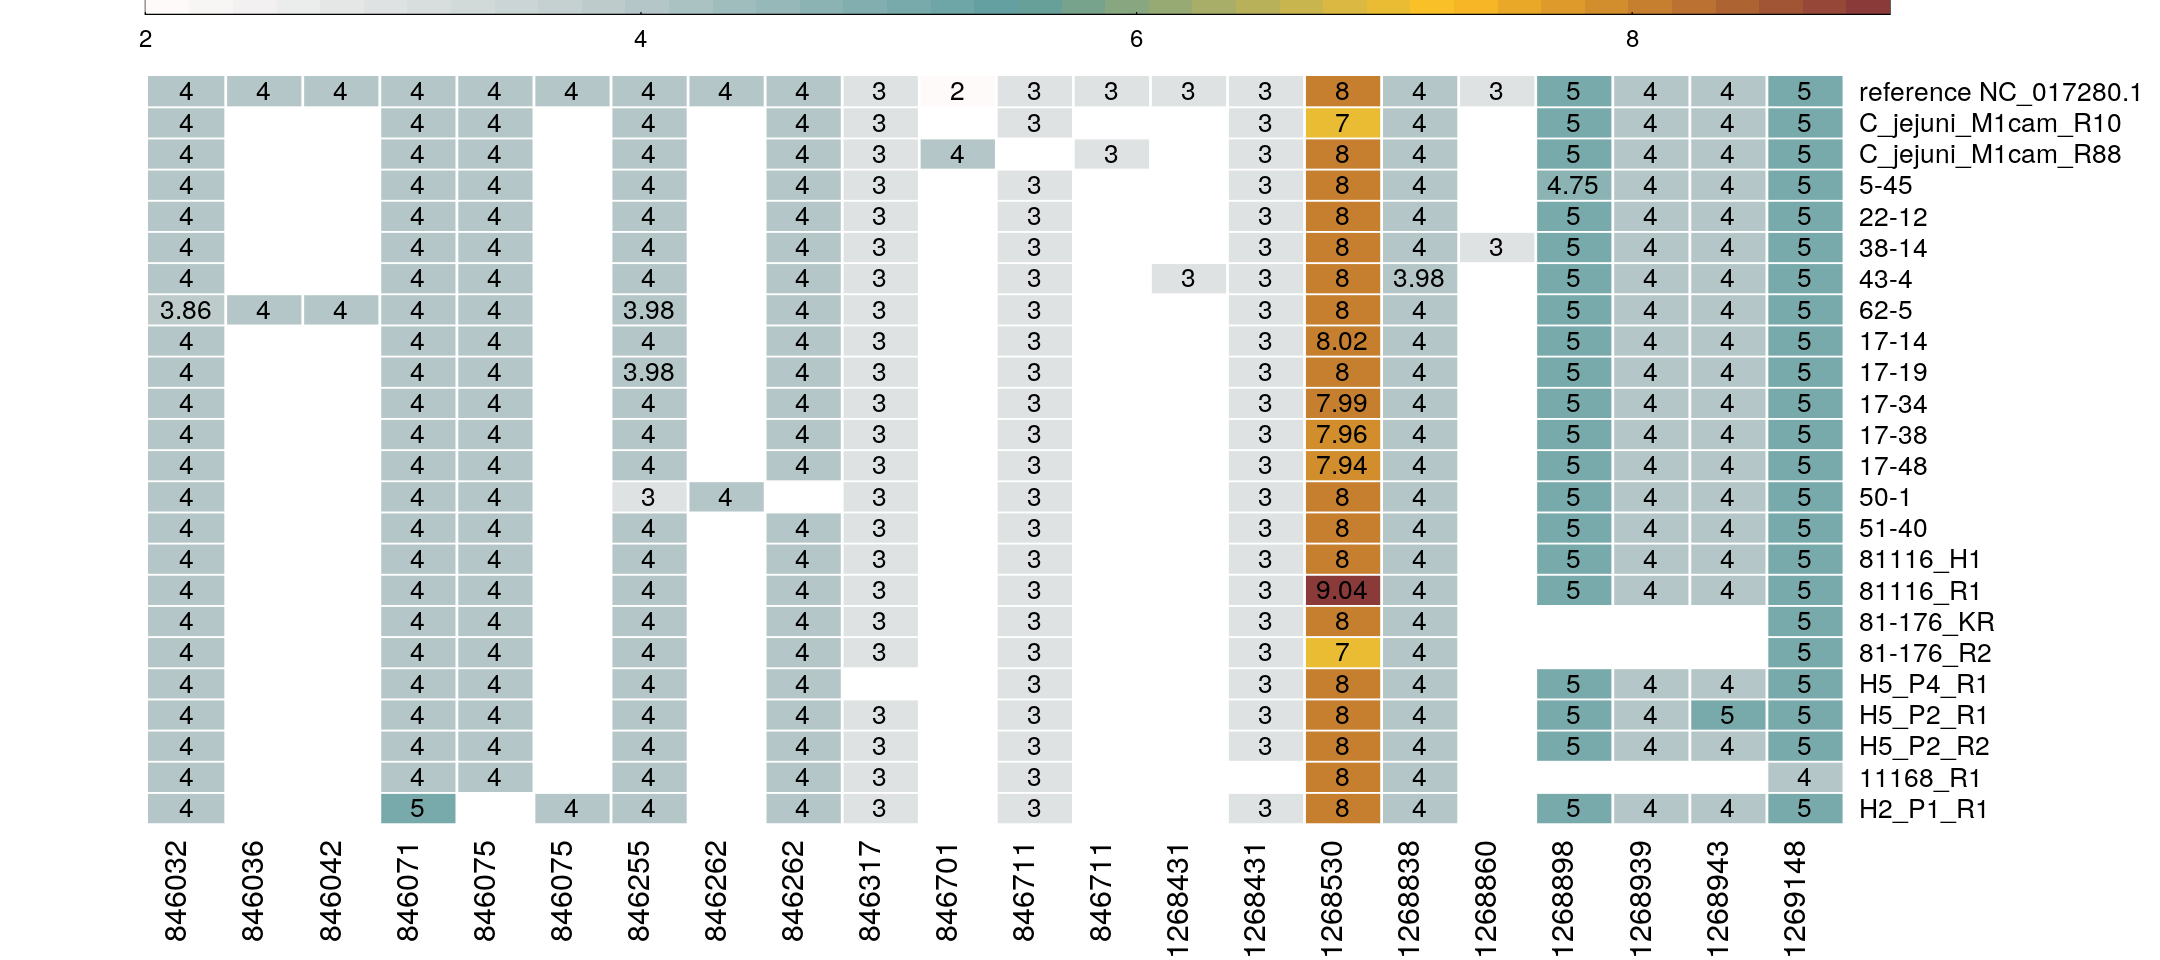

In [15]:
options(repr.plot.width=18, repr.plot.height=8)
par(oma=c(3.6,0,0,15))

#coul <- colorRampPalette(brewer.pal(9, "YlOrBr"))(12)[2:12]
coul <- colorRampPalette(c("snow", "azure3", "cadetblue", "goldenrod1", "indianred4"))(40)

x2 <- ifelse (x < 0.1, "", round(x,2))
heatmap.2 (x, scale="none", col= coul, # do not rescale (standardise) values
           cexRow=2, cexCol=2.3, # column text size
           rowsep=1:110, colsep=1:450,  sepwidth=c(0.02, 0.02),
           Colv=FALSE, Rowv = FALSE, dendrogram = "none", 
           cellnote = x2, notecex=2, notecol="black",  ## numbers inside cells
           tracecol=NA,  # remove vertical lines
           lmat = rbind( c(0,4), c(0, 3), c(2,1) ), lhei=c(1, 0.1, 12), lwid=c(1,12),  # proportions of width and height
           key=TRUE, keysize=0.2, key.ylab=NA, key.xlab=NA, symkey=FALSE, symbreaks=FALSE, key.title = NA, density.info="none",
           key.par=list(cex.axis=1.6, tcl=0.1, mar=c(3,0,0,0))
           )    # remove color histogram from top left corner

#### trying to fix the strandness for start location of _Bordetella_

[1] 56

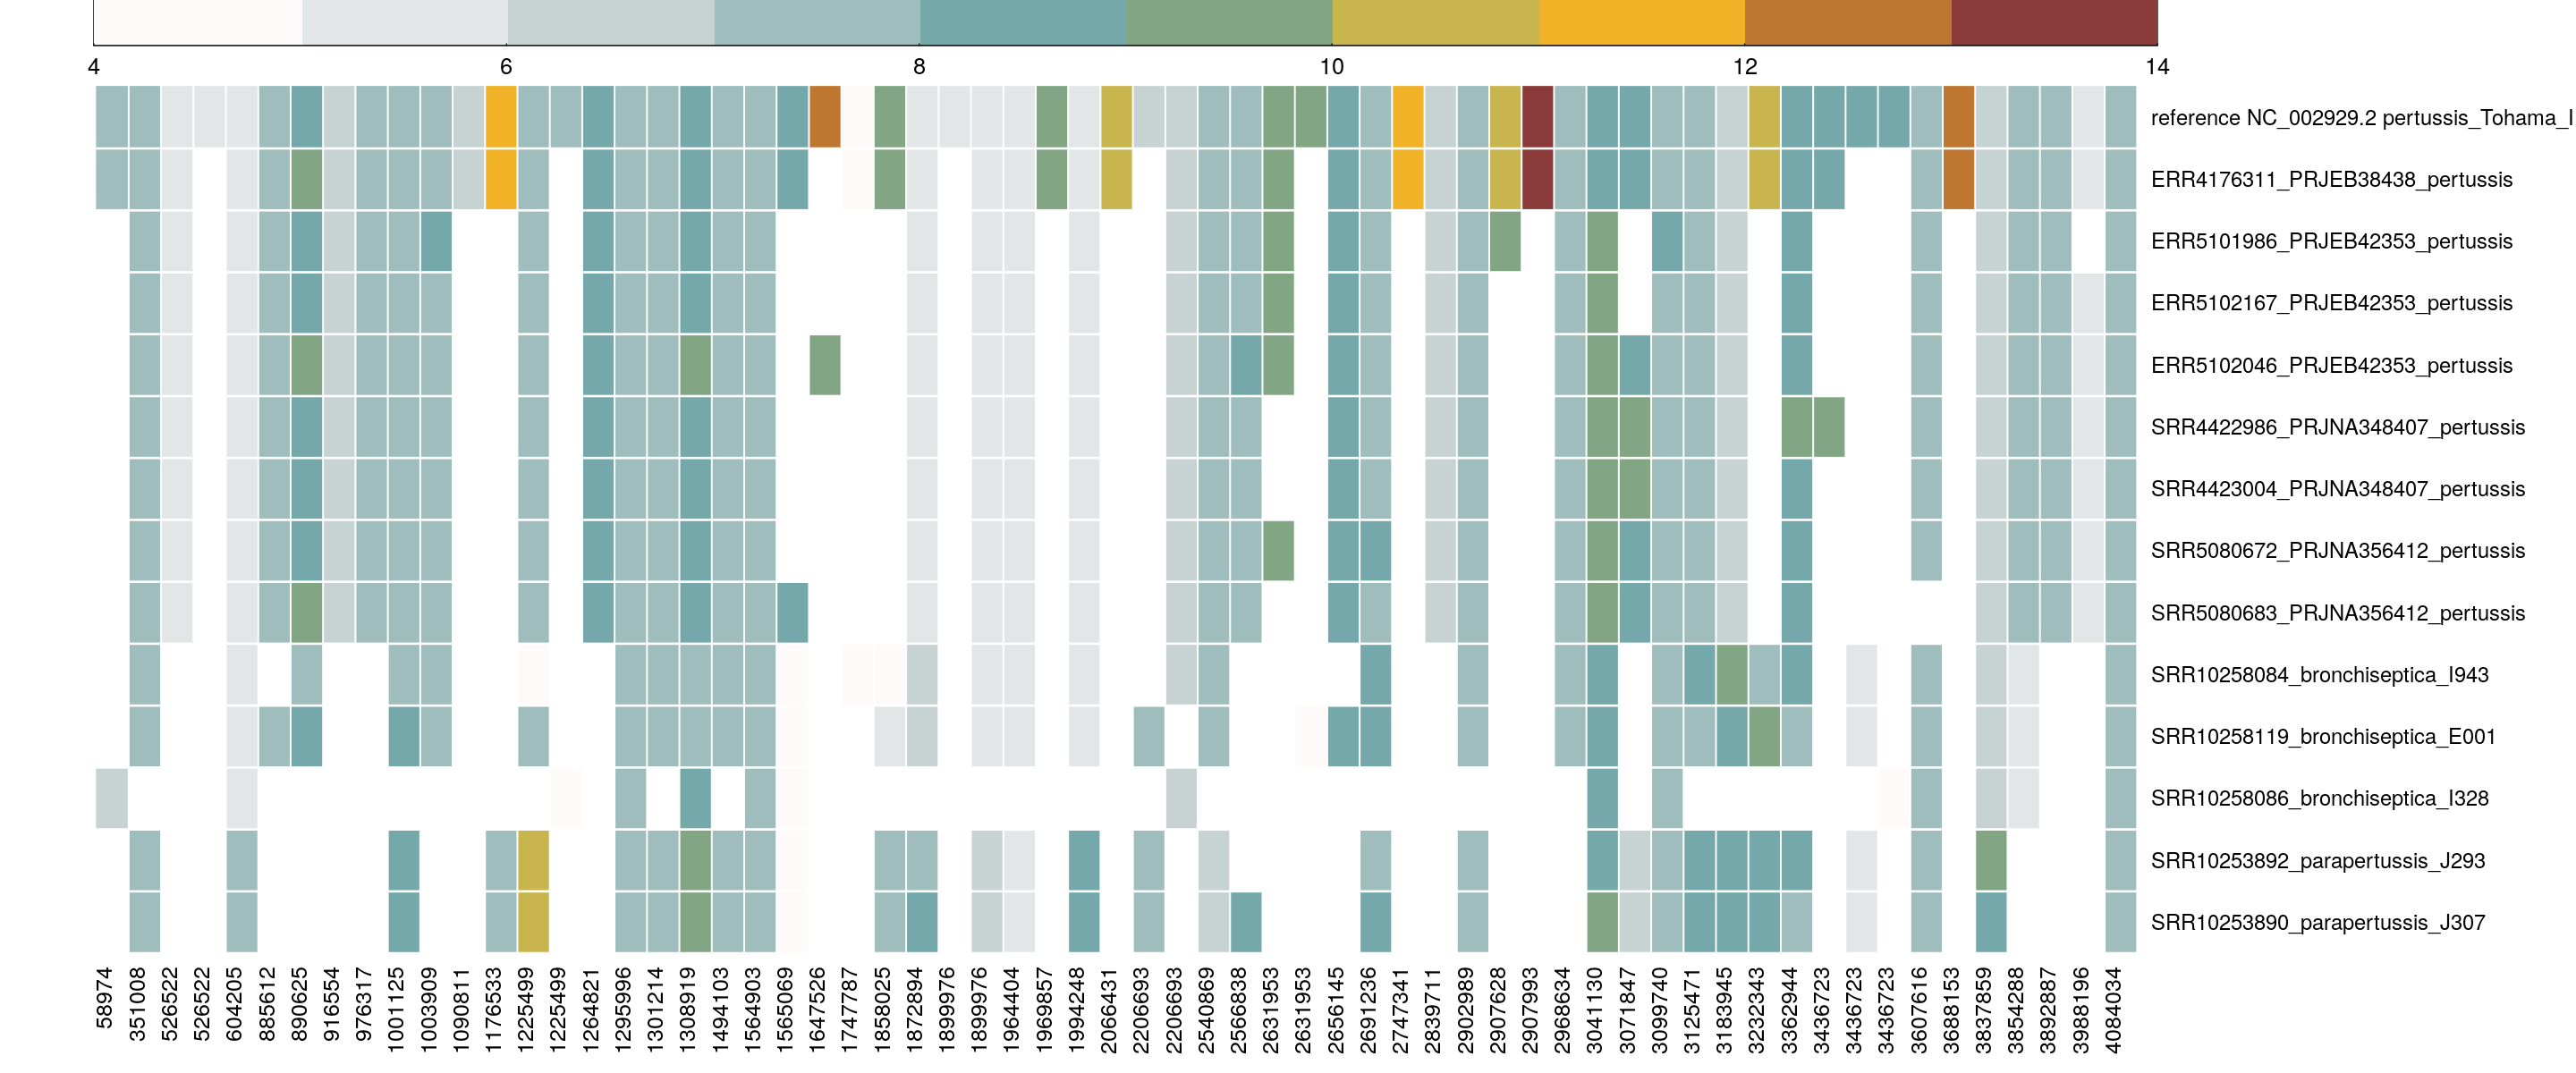

In [16]:
article_csv <- read.csv("004.bordetella/1471-2164-8-122-S3_pertussis.csv", header=T)
article_idx <- pmin(article_csv$Start, article_csv$Stop)

is_it_close <- function (x) {
    y <- sort (abs(as.numeric(x)-article_idx))[1]
    if ( y < 3) {
#         print(paste(x,y));
        return (TRUE);
    }
    return (FALSE);
}

new_bolen <- bolen[,bolen["reference NC_002929.2 pertussis_Tohama_I",]>4]  ## only big HT
in_gene <- as.logical(lapply(colnames(new_bolen), is_it_close))

#rownames(new_bolen)
#in_gene <- (as.numeric(colnames(calen)) > 1268323) & (as.numeric(colnames(calen)) < 1269717)
list_of_samples <- c("reference NC_002929.2 pertussis_Tohama_I", "ERR4176311_PRJEB38438_pertussis",
                     "ERR5101986_PRJEB42353_pertussis",  "ERR5102167_PRJEB42353_pertussis","ERR5102046_PRJEB42353_pertussis",
                     "SRR4422986_PRJNA348407_pertussis", "SRR4423004_PRJNA348407_pertussis",
                     "SRR5080672_PRJNA356412_pertussis", "SRR5080683_PRJNA356412_pertussis",
                    "SRR10258084_bronchiseptica_I943", "SRR10258119_bronchiseptica_E001", "SRR10258086_bronchiseptica_I328", 
                     "SRR10253892_parapertussis_J293", "SRR10253890_parapertussis_J307") 

in_sample <- as.logical(lapply(rownames(new_bolen), function(x){x %in% list_of_samples}))
x <- new_bolen[in_sample, in_gene]
x <- x[match(list_of_samples,rownames(x)),]
length(unique(colnames(x)))

options(repr.plot.width=24, repr.plot.height=10)
par(oma=c(3.5,0,0,26))
coul <- colorRampPalette(c("snow", "azure3", "cadetblue", "goldenrod1", "indianred4"))(10)

x2 <- ifelse (x < 0.1, "", round(x,1))
heatmap.2 (x, scale="none", col= coul, # do not rescale (standardise) values
           cexRow=1.8, cexCol=1.9, # column text size
           rowsep=1:110, colsep=1:450,  sepwidth=c(0.02, 0.02),
           Colv=FALSE, Rowv = FALSE, dendrogram = "none", 
           #cellnote = x2, notecex=0.9, notecol="black",  ## numbers inside cells
           tracecol=NA,  # remove vertical lines
           #key=FALSE, lhei=c(1, 24), lwid=c(1,24),  # proportions of width and height
           
           lmat = rbind( c(0,4), c(0, 3), c(2,1) ), lhei=c(1, 0.1, 12), lwid=c(1,22),  # proportions of width and height
           key=TRUE, keysize=0.2, key.ylab=NA, key.xlab=NA, symkey=FALSE, symbreaks=FALSE, key.title = NA, density.info="none",
           key.par=list(cex.axis=1.7, tcl=0.1, mar=c(2,0,0,0))
           )    # remove color histogram from top left corner